## 3.1 从感知机到神经网络

### 3.1.1 神经网络的例子

<div align="center">
<img src="https://s2.loli.net/2022/11/03/O84UFWZpRiPnAq5.png" width="60%">
</div>

### 3.1.2 复习感知机

$$
y=\left\{
\begin{array}{cc}
0 & (b+w_1x_1+w_2x_2 \leq 0) \\
1 & (b+w_1x_1+w_2x_2 > 0)
\end{array}
\right.
$$

---

$$
y=h(b+w_1x_1+w_2x_2) \\
h(x)=\left\{
\begin{array}{cc}
0 & (x \leq 0) \\
1 & (x > 0) \\
\end{array}
\right.
$$

### 3.1.3 激活函数登场

$$
a = b + w_1x_1+w_2x_2 \\
y = h(a)
$$

## 3.2 激活函数

### 3.2.1 sigmoid函数

$$
h(x) = \frac{1}{1 + e^{-x}}
$$

### 3.2.2 阶跃函数的实现

In [ ]:
def step_function(x):
  if x > 0:
    return 1
  else:
    return 0

In [ ]:
import numpy as np

def step_function(x):
  # numpy
  y = x > 0
  return np.array(x, dtype=int)

In [ ]:
import numpy as np
x = np.array([-1.0, 1.0, 2.0])
print(x)

y = x > 0
print(y)

y = np.array(y, dtype=int)
# y = y.astype(np.int)
print(y)

[-1.  1.  2.]
[False  True  True]
[0 1 1]


### 3.2.3 阶跃函数的图形

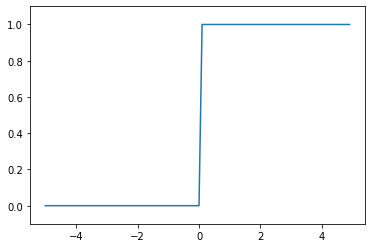

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def step_function(x):
  return np.array(x > 0, dtype=int)


x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

### 3.2.4 sigmoid函数的实现

$$
sigmoid(x) = \frac{1}{1 + e^{-x}}
$$

In [ ]:
def sigmoid(x):
  return  1 / (1 + np.exp(-x))

In [ ]:
x = np.array([-1.0, 1.0, 2.0])
print(sigmoid(x))

[0.26894142 0.73105858 0.88079708]


In [ ]:
# Numpy的广播功能
t = np.array([1.0, 2.0, 3.0])
print(1.0 + t)
print(1.0 / t)

[2. 3. 4.]
[1.         0.5        0.33333333]


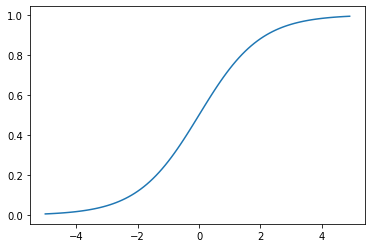

In [ ]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
# plt.ylim(-0.1, 1.1)
plt.show()

### 3.2.5 sigmoid函数和阶跃函数的比较

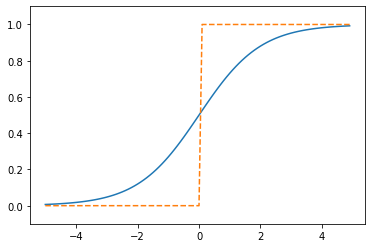

In [ ]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x)
y2 = step_function(x)
plt.plot(x, y1, linestyle='-')
plt.plot(x, y2, linestyle='--')
plt.ylim(-0.1, 1.1)
plt.show()

### 3.2.6 非线性函数

### 3.2.7 ReLU函数

$$
h(x) = \left\{
\begin{array}{cc}
x & (x > 0) \\
0 & (x \leq 0)
\end{array}
\right.
$$

In [ ]:
def relu(x):
  return np.maximum(0, x)

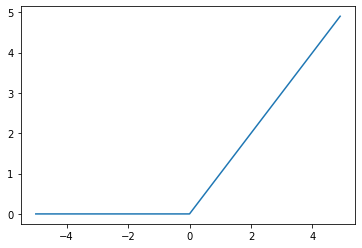

In [ ]:
x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.show()

## 3.3 多维数组的运算

### 3.3.1 多维数组

In [ ]:
import numpy as np
A = np.array([1, 2, 3, 4])
print(A)
print(np.ndim(A))
print(A.shape)
print(A.shape[0])

print("".center(13, '-'))

B = np.array([[1,2], [3,4], [5,6]])
print(B)
print(np.ndim(B))
print(B.shape)

[1 2 3 4]
1
(4,)
4
-------------
[[1 2]
 [3 4]
 [5 6]]
2
(3, 2)


### 3.3.2 矩阵乘法

<div align="center">
<img src="https://s2.loli.net/2022/11/03/FRNyXGbCicgAV1T.png" width="60%">
</div>

<div align="center">
<img src="https://s2.loli.net/2022/11/03/boZS9ga6PK584E3.png" width="60%">
</div>

In [ ]:
A = np.array([[1, 2], [3, 4]])
print(A.shape)

B = np.array([[5, 6], [7, 8]])
print(B.shape)

print(np.dot(A, B))

(2, 2)
(2, 2)
[[19 22]
 [43 50]]


In [ ]:
A = np.array([[1, 2, 3], [4, 5, 6]])
print(A.shape)

B = np.array([[1, 2], [3, 4], [5, 6]])
print(B.shape)

print(np.dot(A, B))

(2, 3)
(3, 2)
[[22 28]
 [49 64]]


In [ ]:
# Error
C = np.array([[1, 2], [3, 4]])
print(C.shape)
print(A.shape)
print(np.dot(A, C))
ValueError: shapes (2,3) and (2,2) not aligned: 3 (dim 1) != 2 (dim 0)

SyntaxError: ignored

### 3.3.3 神经网络的内积

<div align="center">
<img src="https://s2.loli.net/2022/11/03/a1LepvkoZWNjxFC.png" width="60%">
</div>

In [ ]:
X = np.array([1, 2])
print(X.shape)

W = np.array([[1, 3, 5], [2, 4, 6]])
print(W)
print(W.shape)

Y = np.dot(X, W)
print(Y)

(2,)
[[1 3 5]
 [2 4 6]]
(2, 3)
[ 5 11 17]


## 3.4 3层神经网络的实现
<div align="center">
<img src="https://s2.loli.net/2022/11/03/RaDhzdXGopenL8u.png" width="60%">
</div>

### 3.4.1 符号确认

<div align="center">
<img src="https://s2.loli.net/2022/11/03/cFkPSOGIj2Dqx8o.png" width="60%">
</div>

### 3.4.2 各层间信号传递的实现

<div align="center">
<img src="https://s2.loli.net/2022/11/03/mKwYjUNn7xtadLJ.png" widtH="60%">
</div>

$$
a_1^{(1)} = w_{11}^{(1)}x_1 + w_{12}^{(1)}x_2+b_1^{(1)}
$$


$$
A^{(1)}=XW^{(1)} + B^{(1)}
$$

\begin{array}{}
A^{(1)}=(a_1^{(1)} & a_2^{(1)} & a_3^{(1)}), & X = (x_1 & x_2), & B = (b_1^{(1)}& b_2^{(1)} & b_3^{(1)}) 
\end{array}

$$
W^{(1)} = \left( 
\begin{array}{cc}
  w_{11}^{(1)} & w_{21}^{(1)} & w_{31}^{(1)} \\
  w_{12}^{(1)} & w_{22}^{(1)} & w_{32}^{(1)} \\
\end{array}
  \right)
$$


In [ ]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([[0.1, 0.2, 0.3]])

print(W1.shape)
print(X.shape)
print(B1.shape)

A1 = np.dot(X, W1) + B1

(2, 3)
(2,)
(1, 3)


In [ ]:
Z1 = sigmoid(A1)

print(A1)
print(Z1)

[[0.3 0.7 1.1]]
[[0.57444252 0.66818777 0.75026011]]


<div align="center">
<img src="https://s2.loli.net/2022/11/03/nO3YuGHsLSUy9RE.png" width="60%">
</div>

In [ ]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

(1, 3)
(3, 2)
(2,)


<div align="center">
<img src="https://s2.loli.net/2022/11/03/7laKAvjIY8FJr4R.png", width="60%">
</div>

In [ ]:
def identity_function(x):
  return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)

### 3.4.3 代码实现小结

In [ ]:
def init_network():
  network = {}
  network["W1"] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
  network["b1"] = np.array([0.1, 0.2, 0.3])
  network["W2"] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
  network["b2"] = np.array([0.1, 0.2])
  network["W3"] = np.array([[0.1, 0.3], [0.2, 0.4]])
  network["b3"] = np.array([0.1, 0.2])

  return network


def forward(network, x):
  W1, W2, W3 = network['W1'], network['W2'], network["W3"]
  b1, b2, b3 = network['b1'], network['b2'], network['b3']

  a1 = np.dot(x, W1) + b1
  z1 = sigmoid(a1)
  a2 = np.dot(z1, W2) + b2
  z2 = sigmoid(a2)
  a3 = np.dot(z2, W3) + b3
  y = identity_function(a3)

  return y


network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]
